In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [7]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [8]:
train_x = train_x / 255.0
test_x = test_x / 255.0

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D,BatchNormalization,Dropout

In [ ]:
train_x = np.expand_dims(train_x, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)        

In [11]:
model = Sequential()

In [12]:

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))  
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation="relu"))  
model.add(Dropout(0.5))  
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 128)      512       
 hNormalization)                                                 
                                                        

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
507/750 [===================>..........] - ETA: 20s - loss: 0.6911 - accuracy: 0.7650

In [87]:
loss, accuracy = model.evaluate(test_x, test_y)
print("\n Predicted Accuracy: {:.2f}%".format(accuracy * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9089 - loss: 0.3022

 Predicted Accuracy: 90.75%


In [1]:

labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [73]:
predictions = model.predict(test_x[:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


In [74]:
import numpy as np

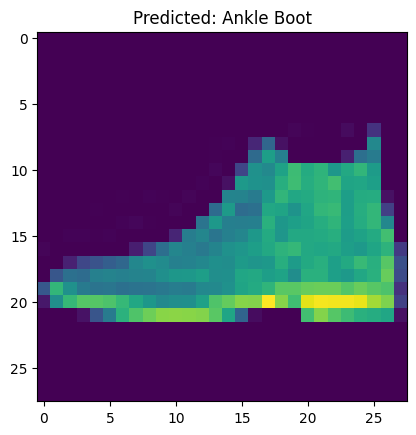

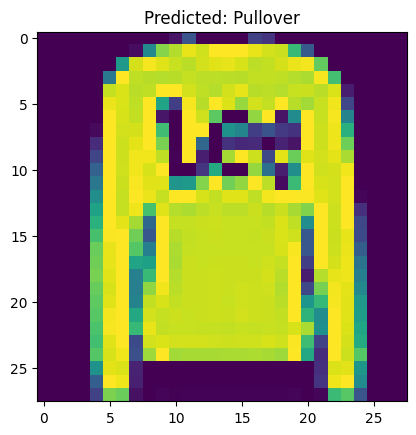

In [81]:
for i in range(2):
    label = labels[np.argmax(predictions[i])]
    plt.imshow(test_x[i].reshape(28, 28))
    plt.title(f"Predicted: {label}")
    plt.show()


In [ ]:
# from sklearn.metrics import classification_report

# num_classes = 10 
# class_names = ["class {}".format(i) for i in range(num_classes)]

# predictions = model.predict(test_x)  
# y_pred = predictions.argmax(axis=1)  

# cr = classification_report(test_y, y_pred, target_names=class_names)
# print(cr)

from sklearn.metrics import classification_report
names = [f"class {i}" for i in range(10)]
print(classification_report(test_y, model.predict(test_x).argmax(1), target_names=names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

     class 0       0.84      0.89      0.86      1000
     class 1       1.00      0.98      0.99      1000
     class 2       0.88      0.84      0.86      1000
     class 3       0.94      0.88      0.91      1000
     class 4       0.82      0.88      0.85      1000
     class 5       0.98      0.98      0.98      1000
     class 6       0.73      0.72      0.72      1000
     class 7       0.95      0.97      0.96      1000
     class 8       0.98      0.97      0.98      1000
     class 9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

